In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import missingno as msno

In [2]:
df=pd.read_csv('adult.csv', na_values=['?', ' ?', '? '])

In [3]:
df.shape

(48842, 15)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,40.041255,27.258094,17.0,28.0,37.0,48.0,810.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


<=50K    37155
>50K     11687
Name: income, dtype: int64

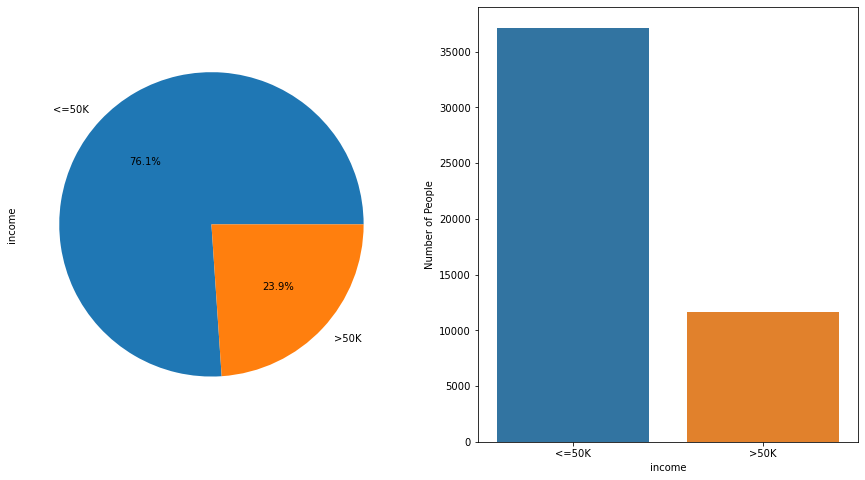

In [7]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='income',data=df)
plt.ylabel('Number of People')
df['income'].value_counts()

# Preprocessing

In [8]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])

workclass         2799
occupation        2809
native-country     857
dtype: int64


In [9]:
df[df['age']>170]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
33,230,Local-gov,258120,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
760,300,Federal-gov,340899,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
1348,250,Private,86646,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,4865,0,48,United-States,<=50K
1379,330,Self-emp-not-inc,103435,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,50,United-States,>50K
1717,240,Private,176389,Bachelors,13,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47518,180,Private,231562,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,33,United-States,<=50K
47689,270,Private,184078,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
47773,400,Federal-gov,130749,Some-college,10,Divorced,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,<=50K
48449,200,Private,200153,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,38,United-States,<=50K


In [10]:
index=df[df.age>=170].index
df.loc[index, 'age']=df.loc[index, 'age']/10

In [11]:
df.age.max()

90.0

In [12]:
#Dropping 244 rows that capital-gain is gereater than 50 000
df=df.query("`capital-gain`<50000")

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48598.0,38.603585,13.712447,17.0,28.0,37.0,48.0,90.0
fnlwgt,48598.0,189684.801082,105630.335923,12285.0,117550.5,178215.0,237713.0,1490400.0
educational-num,48598.0,10.063295,2.562932,1.0,9.0,10.0,12.0,16.0
capital-gain,48598.0,582.412136,2536.651465,0.0,0.0,0.0,0.0,41310.0
capital-loss,48598.0,87.941644,403.967187,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48598.0,40.371908,12.369769,1.0,40.0,40.0,45.0,99.0


In [14]:
df['native-country'].value_counts(normalize=True)

United-States                 0.913342
Mexico                        0.019874
Philippines                   0.006115
Germany                       0.004314
Puerto-Rico                   0.003853
Canada                        0.003790
El-Salvador                   0.003246
India                         0.003078
Cuba                          0.002890
England                       0.002660
China                         0.002534
South                         0.002387
Jamaica                       0.002220
Italy                         0.002199
Dominican-Republic            0.002136
Japan                         0.001906
Guatemala                     0.001843
Poland                        0.001822
Vietnam                       0.001801
Columbia                      0.001780
Haiti                         0.001571
Portugal                      0.001403
Taiwan                        0.001340
Iran                          0.001236
Nicaragua                     0.001026
Greece                   

In [15]:
#Dropping all countries except United-States
df=df.query('`native-country`=="United-States"')

In [16]:
def object_cols(df):    
    ob_cols=[col for col in df.columns if df[col].dtype=='O']
    return ob_cols

In [17]:
def numeric_cols(dataframe):
    numeric_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    return numeric_cols

In [24]:
def fill_with_mode(df,cols):
    for col in cols:
        df[col]=df[col].fillna(df[col].value_counts().index[0])
    return df

In [26]:
null_cols=list(df.columns[df.isnull().any()])
null_cols  #Columns that contain Null values

['workclass', 'occupation']

In [27]:
df=fill_with_mode(df,null_cols)

In [28]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])

Series([], dtype: int64)


# Outliers

In [18]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le=LabelEncoder()
oe=OrdinalEncoder()

In [20]:
df['income']=le.fit_transform(df['income'])

In [29]:
for i in object_cols(df):
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [38]:
x=df.copy()
x.drop('income',axis=1,inplace=True)
y=df['income']

In [42]:
from imblearn.over_sampling import SMOTE
o=SMOTE()

In [44]:
x,y=o.fit_resample(x,y)  #Data balanced

# Model

In [48]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [55]:
def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [64]:
def performance(p,ytest,m,xtest,s):
    print(m)
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('---------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('---------------------------------------\n')

In [60]:
models=[GaussianNB(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]
rs=randomstate(x,y)

In [65]:
def classification_models(x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    for model in models:
        model.fit(X_train,Y_train)
        p=model.predict(X_test)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,Y_test,model,X_test,score) 

In [66]:
classification_models(x,y)

GaussianNB()
Accuracy 0.6111
---------------------------------------
Mean of Cross Validation Score 0.6161
---------------------------------------

KNeighborsClassifier()
Accuracy 0.7229
---------------------------------------
Mean of Cross Validation Score 0.7377
---------------------------------------

LogisticRegression()
Accuracy 0.686
---------------------------------------
Mean of Cross Validation Score 0.6197
---------------------------------------

DecisionTreeClassifier()
Accuracy 0.8629
---------------------------------------
Mean of Cross Validation Score 0.8587
---------------------------------------

RandomForestClassifier()
Accuracy 0.9004
---------------------------------------
Mean of Cross Validation Score 0.8926
---------------------------------------

AdaBoostClassifier()
Accuracy 0.8829
---------------------------------------
Mean of Cross Validation Score 0.8777
---------------------------------------

GradientBoostingClassifier()
Accuracy 0.8956
------------------

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
params={'n_estimators':[100,300,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10,None]}

In [71]:
g=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
g.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [0.5, 1]})

In [72]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}
GradientBoostingClassifier(max_depth=7, n_estimators=300, subsample=1)
0.9111996136950451


In [73]:
m=GradientBoostingClassifier(max_depth=7, subsample=1)
m.fit(X_train,Y_train)
p=m.predict(X_test)
score=cross_val_score(m,x,y,cv=10)
performance(p,Y_test,m,X_test,score)

GradientBoostingClassifier(max_depth=7, subsample=1)
Accuracy 0.9118
---------------------------------------
Mean of Cross Validation Score 0.9035
---------------------------------------

